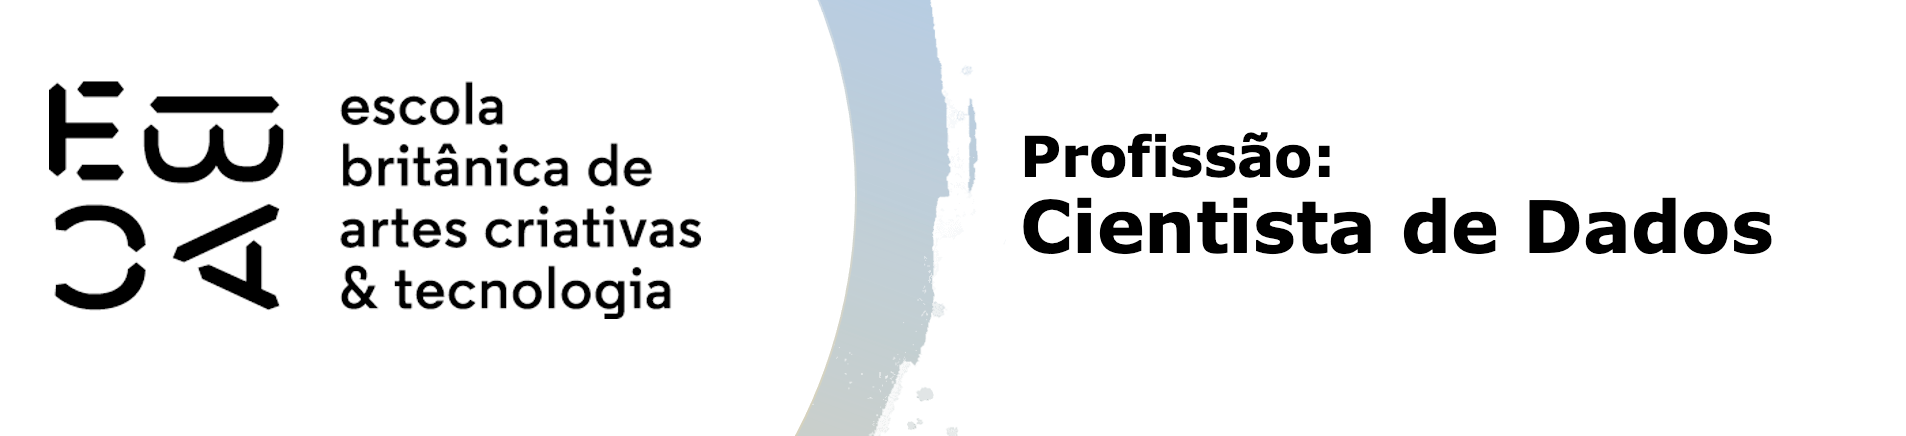

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_pickle('base_nfp.pkl')

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [2]:
# Filtrar dados a partir de janeiro de 2020
data['Data Emissão'] = pd.to_datetime(data['Data Emissão'])
data_filtered = data[data['Data Emissão'] >= '2020-01-01']
data_filtered

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.0,Liberado,2021,2,0.0,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.0,Liberado,2021,2,0.0,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado


C:\Users\Xam_j\AppData\Local\Temp\ipykernel_5252\1615728467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Retorno > 0'] = data_filtered['Retorno'] > 0
C:\Users\Xam_j\AppData\Local\Temp\ipykernel_5252\1615728467.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='Retorno > 0', data=category_summary, palette='viridis')


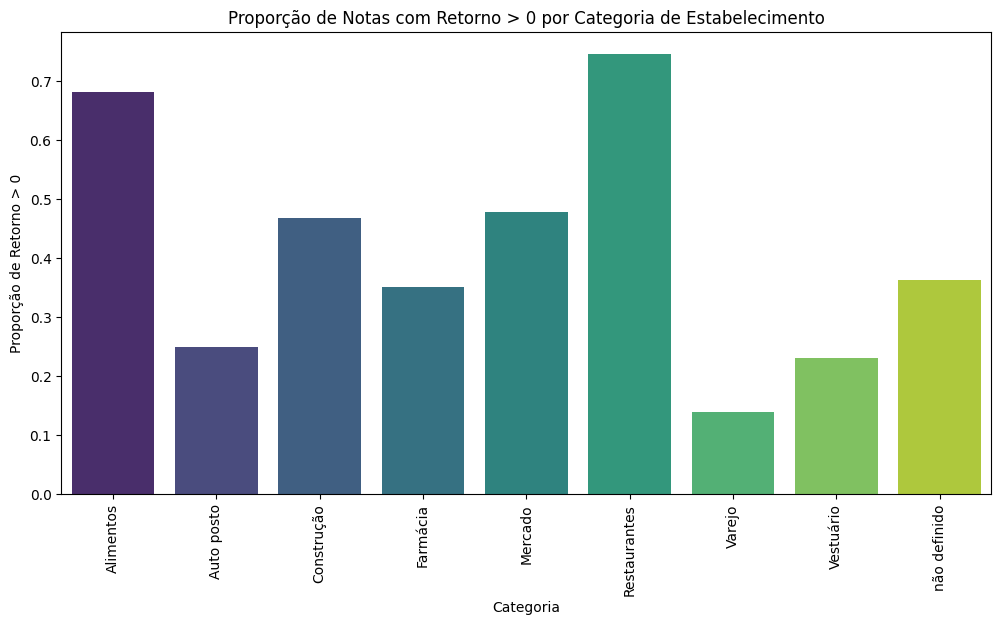

      categoria  Retorno > 0
0     Alimentos     0.681584
1    Auto posto     0.250000
2    Construção     0.468810
3      Farmácia     0.351556
4       Mercado     0.478155
5  Restaurantes     0.746214
6        Varejo     0.138373
7     Vestuário     0.230729
8  não definido     0.363394


In [3]:
# Criar uma coluna para indicar retorno > 0
data_filtered['Retorno > 0'] = data_filtered['Retorno'] > 0

# Proporção de retorno > 0 por categoria
category_summary = data_filtered.groupby('categoria')['Retorno > 0'].mean().reset_index()

# Plotar
plt.figure(figsize=(12, 6))
sns.barplot(x='categoria', y='Retorno > 0', data=category_summary, palette='viridis')
plt.xticks(rotation=90)
plt.title('Proporção de Notas com Retorno > 0 por Categoria de Estabelecimento')
plt.xlabel('Categoria')
plt.ylabel('Proporção de Retorno > 0')
plt.show()

# Mostrar a tabela
print(category_summary)


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

C:\Users\Xam_j\AppData\Local\Temp\ipykernel_5252\3109086829.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y='WOE', data=category_counts, palette='magma')


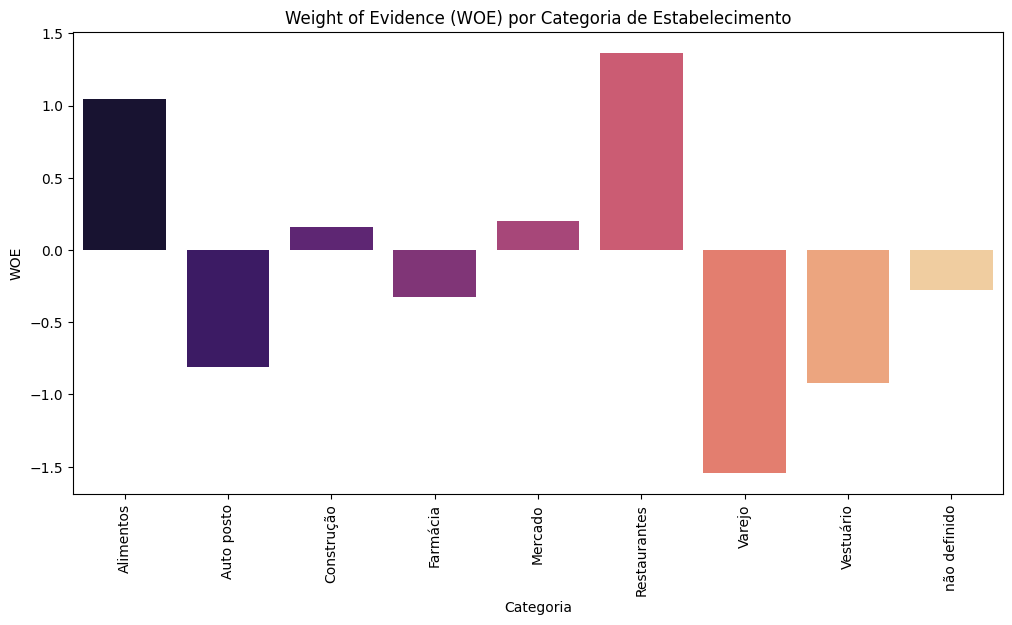

                   WOE
categoria             
Alimentos     1.046342
Auto posto   -0.813331
Construção    0.160360
Farmácia     -0.326928
Mercado       0.197846
Restaurantes  1.363801
Varejo       -1.543585
Vestuário    -0.918918
não definido -0.275381


In [4]:
# Contar total de eventos (retorno > 0) e não eventos (retorno <= 0)
total_events = data_filtered['Retorno > 0'].sum()
total_non_events = (~data_filtered['Retorno > 0']).sum()

# Contar eventos e não eventos por categoria
category_counts = data_filtered.groupby('categoria')['Retorno > 0'].agg(['sum', 'count'])
category_counts.rename(columns={'sum': 'events', 'count': 'total'}, inplace=True)
category_counts['non_events'] = category_counts['total'] - category_counts['events']

# Calcular as proporções
category_counts['prop_events'] = category_counts['events'] / total_events
category_counts['prop_non_events'] = category_counts['non_events'] / total_non_events

# Calcular WOE
category_counts['WOE'] = np.log(category_counts['prop_events'] / category_counts['prop_non_events'])

# Plotar WOE
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y='WOE', data=category_counts, palette='magma')
plt.xticks(rotation=90)
plt.title('Weight of Evidence (WOE) por Categoria de Estabelecimento')
plt.xlabel('Categoria')
plt.ylabel('WOE')
plt.show()

# Mostrar tabela com WOE
print(category_counts[['WOE']])


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [5]:
# Calcular IV
category_counts['IV'] = (category_counts['prop_events'] - category_counts['prop_non_events']) * category_counts['WOE']
IV = category_counts['IV'].sum()

print(f'Information Value (IV): {IV}')


Information Value (IV): 0.27882574285237305


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<span style="color:orange">

1. - **Melhores Categorias para Créditos Positivos:** 
Restaurantes e Alimentos têm a maior probabilidade de gerar retorno positivo, com Restaurantes liderando em termos de WOE.

2. - **Categorias Neutras:** Mercado e Construção mostram propensões moderadas e baixas, respectivamente, para gerar créditos.

3. - **Categorias Menos Favoráveis:** Farmácias, Vestuário, Auto postos e Varejo têm uma propensão significativamente menor a gerar retorno positivo, com o Varejo sendo a categoria menos favorável.

O IV de 0.2788 está na faixa que indica um bom poder discriminativo. Isso significa que a variável categoria é bastante útil para prever se uma nota fiscal gerará um retorno positivo ou não.
</span>
